In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings(action='ignore') # 경고 무시
plt.rc('font', family='NanumGothic') # 한클

Text(0, 0.5, '두번째 특성')

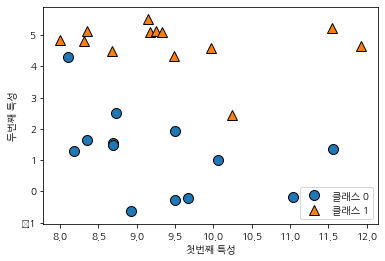

In [8]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")

In [9]:
X.shape

(26, 2)

Text(0, 0.5, '타깃')

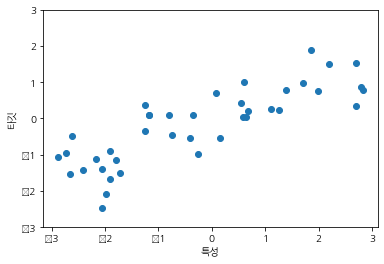

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
cancer.data.shape

(569, 30)

In [14]:
{feature: c for feature, c in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

In [15]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [17]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

## k-Nearest Neighbors

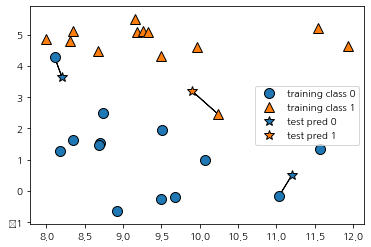

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

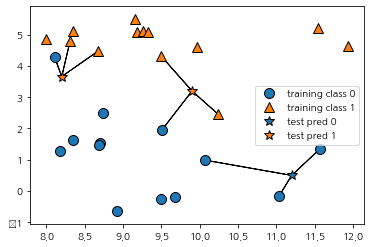

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [21]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [25]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [27]:
clf.score(X_test, y_test)

0.8571428571428571

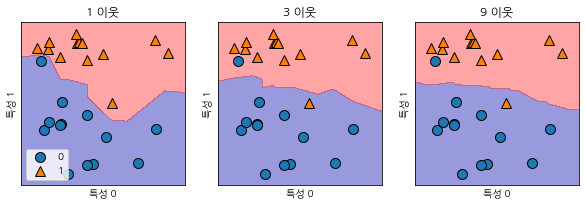

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

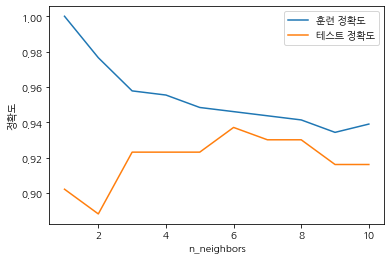

In [30]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

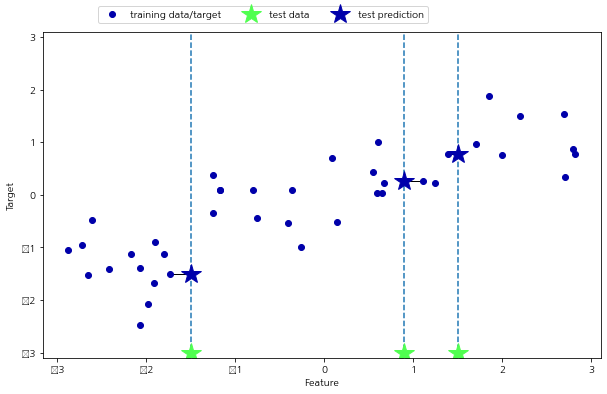

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

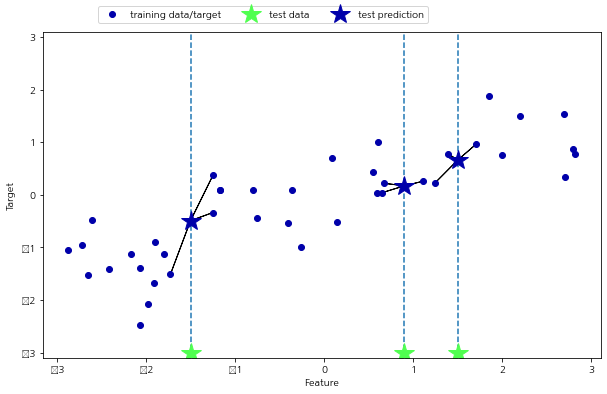

In [32]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [33]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [34]:
reg.score(X_test, y_test)

0.8344172446249605

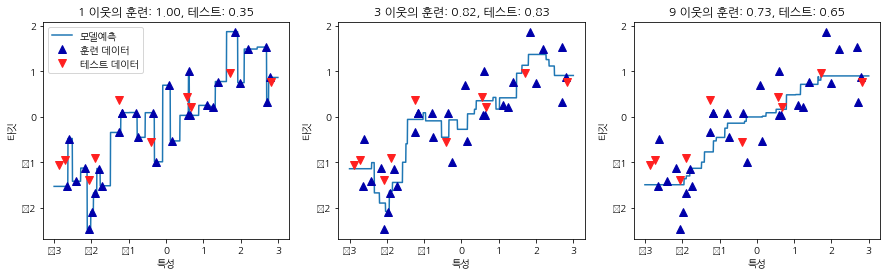

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line=np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} 이웃의 훈련: {:.2f}, 테스트: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(['모델예측', '훈련 데이터', '테스트 데이터'], loc='best')

## Linear Regression

w[0]: 0.393906  b: -0.031804


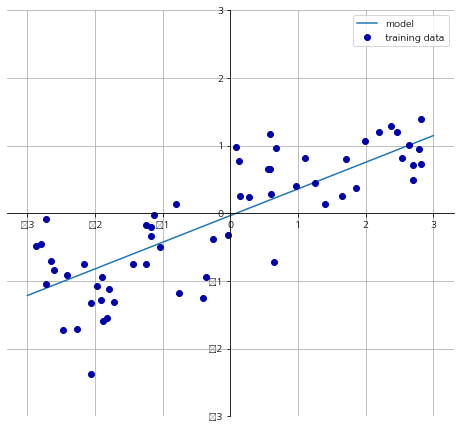

In [37]:
mglearn.plots.plot_linear_regression_wave()

In [38]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [39]:
lr.coef_, lr.intercept_

(array([0.39390555]), -0.031804343026759746)

In [40]:
lr.score(X_train, y_train)

0.6700890315075756

In [41]:
lr.score(X_test, y_test)

0.65933685968637

In [42]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [43]:
lr.score(X_train, y_train)

0.952051960903273

In [44]:
lr.score(X_test, y_test)

0.6074721959665708

## Ridge Regression

In [45]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

In [46]:
ridge.score(X_train, y_train)

0.885796658517094

In [47]:
ridge.score(X_test, y_test)

0.7527683481744755

In [48]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

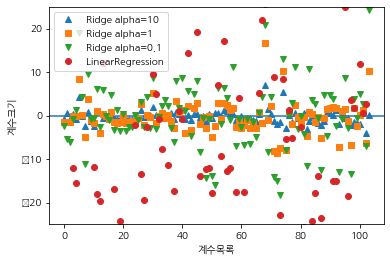

In [55]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel("계수목록")
plt.ylabel("계수크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

## Lasso

In [56]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

In [57]:
X_train.shape

(379, 104)

In [58]:
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.29323768991114607, 0.20937503255272294)

In [60]:
np.sum(lasso.coef_ != 0)

4

In [61]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso001.score(X_train, y_train), lasso001.score(X_test, y_test)

(0.8962226511086497, 0.7656571174549983)

In [62]:
np.sum(lasso001.coef_ != 0)

33

In [63]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
lasso00001.score(X_train, y_train), lasso00001.score(X_test, y_test)

(0.9507158754515467, 0.6437467421272709)

Text(0, 0.5, '계수크기')

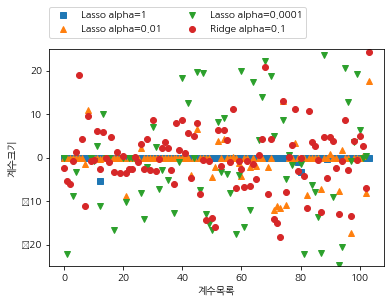

In [64]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수목록")
plt.ylabel("계수크기")